valore vero di mu:  1
valore di mu massimo trovato:  0.9954954954954955


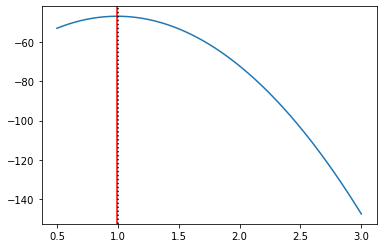

In [16]:
import numpy as np
import scipy.stats
from scipy.stats import norm
from matplotlib import pyplot as plt

N=50
mu_real=1
sigma=0.2

#genero i dati casuali
norm_data=norm.rvs(mu_real,sigma,N)

# Scan across 1000 possible mu values from 0.5 to 5.
mu_proposed = np.linspace(0.5,3,1000)

# compute the lnL for each possible mu.
lnL_scan = []
for mu in mu_proposed:
    lnL_temp = norm.logpdf(norm_data, mu, scale=1) # gives you the log prob. density; useful!
    lnL_temp = np.sum(lnL_temp) # sum over the log pdf of all data points
    lnL_scan.append( lnL_temp )
    
# convert to numpy array
lnL_scan = np.array(lnL_scan)


# mu_proposed that maximizes the lnL.
plt.plot(mu_proposed,lnL_scan)

findmax = mu_proposed[np.argmax(lnL_scan)]
print('valore vero di mu: ', mu_real)
print('valore di mu massimo trovato: ', findmax)
plt.axvline(findmax,c='red')

plt.axvline(mu_real,c='black',ls='dotted')

In [19]:
#confronto con la formula analitica MLE
MLE=1/N* np.sum(norm_data)
print('valore MLE: ', MLE)

valore MLE:  0.9947186866036444


In [22]:
#stima errore con matrice di Fisher
#vedi documentazione per np.diff mi da la differenza tra 2 punti, per ogni punti nell'array
#per fare la derivata devo dividere per la differenza tra i punti sull'asse x
fisherError= np.sqrt(- np.diff(lnL_scan, 2) / (np.diff(norm_data)**2))

ValueError: operands could not be broadcast together with shapes (998,) (49,) 